<a href="https://colab.research.google.com/github/mmjck/MachineLearning/blob/master/Atividade_%5BSUPER%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Construção de uma ResNet18



In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
from tensorflow import keras
from keras import layers

In [3]:
from keras.preprocessing.image import ImageDataGenerator, load_img

from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import random



Obs.: Dataset diferente do proposto na atividade (menor), porém contendo os mesmo rótulos.

In [4]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-12-17 07:07:02--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.2.112, 172.217.164.144, 172.217.7.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.2.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   126MB/s    in 0.5s    

2020-12-17 07:07:02 (126 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [5]:
local = '/tmp/cats_and_dogs_filtered.zip'
TRAIN = "/tmp/cats_and_dogs_filtered/train"
TEST = "/tmp/cats_and_dogs_filtered/test"

In [6]:
import os
import zipfile

local_zip = local
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [7]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
train_dir

'/tmp/cats_and_dogs_filtered/train'

In [8]:
! cd '/tmp/cats_and_dogs_filtered/train/' && mkdir train &&  cd cats && ls && cp *jpg '../train'
! cd '/tmp/cats_and_dogs_filtered/train' && cd dogs && ls && cp *jpg '../train'

cat.0.jpg    cat.250.jpg  cat.400.jpg  cat.551.jpg  cat.701.jpg  cat.852.jpg
cat.100.jpg  cat.251.jpg  cat.401.jpg  cat.552.jpg  cat.702.jpg  cat.853.jpg
cat.101.jpg  cat.252.jpg  cat.402.jpg  cat.553.jpg  cat.703.jpg  cat.854.jpg
cat.102.jpg  cat.253.jpg  cat.403.jpg  cat.554.jpg  cat.704.jpg  cat.855.jpg
cat.103.jpg  cat.254.jpg  cat.404.jpg  cat.555.jpg  cat.705.jpg  cat.856.jpg
cat.104.jpg  cat.255.jpg  cat.405.jpg  cat.556.jpg  cat.706.jpg  cat.857.jpg
cat.105.jpg  cat.256.jpg  cat.406.jpg  cat.557.jpg  cat.707.jpg  cat.858.jpg
cat.106.jpg  cat.257.jpg  cat.407.jpg  cat.558.jpg  cat.708.jpg  cat.859.jpg
cat.107.jpg  cat.258.jpg  cat.408.jpg  cat.559.jpg  cat.709.jpg  cat.85.jpg
cat.108.jpg  cat.259.jpg  cat.409.jpg  cat.55.jpg   cat.70.jpg	 cat.860.jpg
cat.109.jpg  cat.25.jpg   cat.40.jpg   cat.560.jpg  cat.710.jpg  cat.861.jpg
cat.10.jpg   cat.260.jpg  cat.410.jpg  cat.561.jpg  cat.711.jpg  cat.862.jpg
cat.110.jpg  cat.261.jpg  cat.411.jpg  cat.562.jpg  cat.712.jpg  cat.863.jpg
c

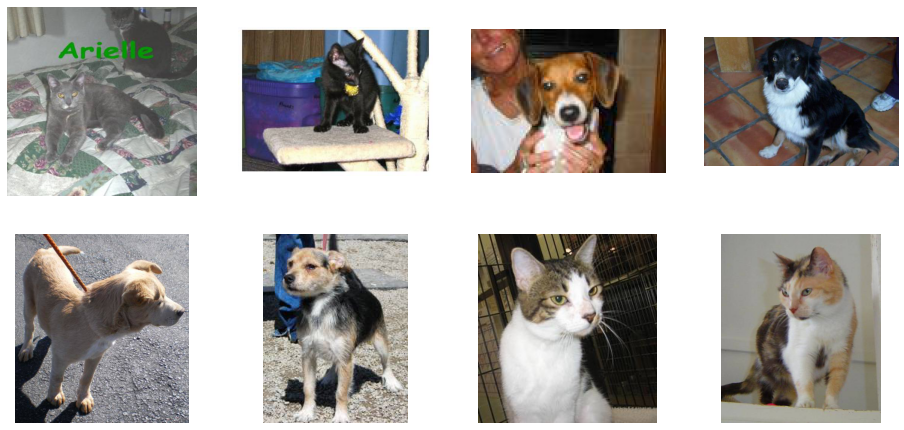

In [9]:
nrows = 4
ncols = 4

pic_index = 0
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
path = train_dir + '/train/'
pix = [fname for fname in os.listdir(path)]

for img_path in range(8):
  sp = plt.subplot(nrows, ncols, img_path + 1)
  sp.axis('Off')
  img = mpimg.imread(path + os.listdir(path)[img_path])
  
  plt.imshow(img)

plt.show()




In [10]:
from sklearn import preprocessing

In [11]:
le = preprocessing.LabelEncoder()

In [12]:
train_labels = []
train_data = []
train_filenames = os.listdir(train_dir + '/train')

for filename in train_filenames:
    label = filename.split('.')[0]
    train_labels.append(label)
    train_data.append(filename)

train_df = pd.DataFrame({
    'id': train_data,
    'label': train_labels
})

In [13]:
train_df.head(10)

,id,label
0,cat.975.jpg,cat
1,cat.23.jpg,cat
2,dog.69.jpg,dog
3,dog.218.jpg,dog
4,dog.170.jpg,dog
5,dog.765.jpg,dog
6,cat.783.jpg,cat
7,cat.130.jpg,cat
8,cat.326.jpg,cat
9,cat.503.jpg,cat


In [14]:
validation_dir = '/tmp/cats_and_dogs_filtered/validation'
valid_labels = []
valid_data = []
valid_filenames = os.listdir(validation_dir + '/cats')

for filename in valid_filenames:
    label = filename.split('.')[0]
    valid_labels.append(label)
    valid_data.append(filename)

valid_filenames = os.listdir(validation_dir + '/dogs')
for filename in train_filenames:
    label = filename.split('.')[0]
    valid_labels.append(label)
    valid_data.append(filename)



valid_df = pd.DataFrame({
    'id': valid_data,
    'label': valid_labels
})

In [20]:
valid_df.head(20)

,id,label
0,cat.2164.jpg,cat
1,cat.2143.jpg,cat
2,cat.2352.jpg,cat
3,cat.2176.jpg,cat
4,cat.2263.jpg,cat
5,cat.2453.jpg,cat
6,cat.2490.jpg,cat
7,cat.2257.jpg,cat
8,cat.2125.jpg,cat
9,cat.2110.jpg,cat


In [21]:
VALID_FRACTION = 0.2

BATCH_SIZE = 32
EPOCHS = 10


IMAGE_WIDTH=254
IMAGE_HEIGHT=254
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

train_df, valid_df = train_test_split(train_df, test_size=VALID_FRACTION)


In [22]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(    
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

In [23]:
path_ = train_dir + '/train'

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    path_, 
    x_col='id',
    y_col='label',    
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    class_mode='categorical',
    batch_size=BATCH_SIZE
)



Found 1600 validated image filenames belonging to 2 classes.


In [24]:
valid_datagen  = tf.keras.preprocessing.image.ImageDataGenerator()

In [25]:
valid_generator = valid_datagen.flow_from_directory(
    directory= validation_dir, 
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    class_mode='categorical',
    batch_size=BATCH_SIZE
)

Found 1000 images belonging to 2 classes.


#ResNet18

Implementação de uma ResNet de acordo com o artigo:

In [40]:
def residual_blocks(layer_resnet, size, stride, is_pair):
    t = layers.Conv2D(filters=size, kernel_size=3, strides=stride, padding="same")(layer_resnet)
    t = layers.BatchNormalization()(t)
    t = layers.Activation('relu')(t)
    
    
    t = layers.Conv2D(filters=size, kernel_size=3, strides=(1, 1), padding='same')(t)
    t = layers.BatchNormalization()(t)
    t = layers.Activation('relu')(t)
    
    
    if is_pair:
      layer_resnet = layers.Conv2D(filters=size, kernel_size=3, strides=(2, 2), padding="same",)(layer_resnet)
      layer_resnet = layers.BatchNormalization()(layer_resnet)
      layer_resnet = layers.Activation('relu')(layer_resnet)

   
    
    
    t = layers.Add()([layer_resnet, t])
    t = layers.Activation('relu')(t)
    
    return t

In [36]:
def create_ResNet(input_shape, num_classes):
  width = input_shape[0] / 2          # crop 0.5 imagem
  heigth = input_shape[1] / 2         # crop 0.5 imagem
  scale = 2
  
  sizes = [64, 128, 256, 512]
  strides = [(1, 1), (2, 2)]


  inputs = layers.Input(shape=input_shape)
  x = layers.BatchNormalization()(inputs)
  x = layers.Conv2D( filters=64, kernel_size=(7, 7), strides=strides[1], padding='same')(x)
  x = layers.Activation('relu')(x)
  x = layers.MaxPooling2D(pool_size=(3, 3), strides=strides[1], padding='same')(x)
  

  for i in range(4):
    for j in range(2):
      #Primeima camada de 64 nao possui shorcut, porém, as demais possuem
      
      x = residual_blocks(x, sizes[i], 
                          stride=strides[1] if j == 0 and i != 0 else strides[0], 
                          is_pair= j == 0 and i != 0)  
      
            
    

  x = layers.AveragePooling2D(pool_size=(1, 1), strides=(1, 1))(x)
  x = layers.Flatten()(x)   
  x = layers.Dense(num_classes,  activation="softmax")(x)

  model = keras.Model(inputs, outputs=x)
  
  return model

In [37]:

input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)
num_classes = 2



In [41]:
model = create_ResNet(input_shape, num_classes)

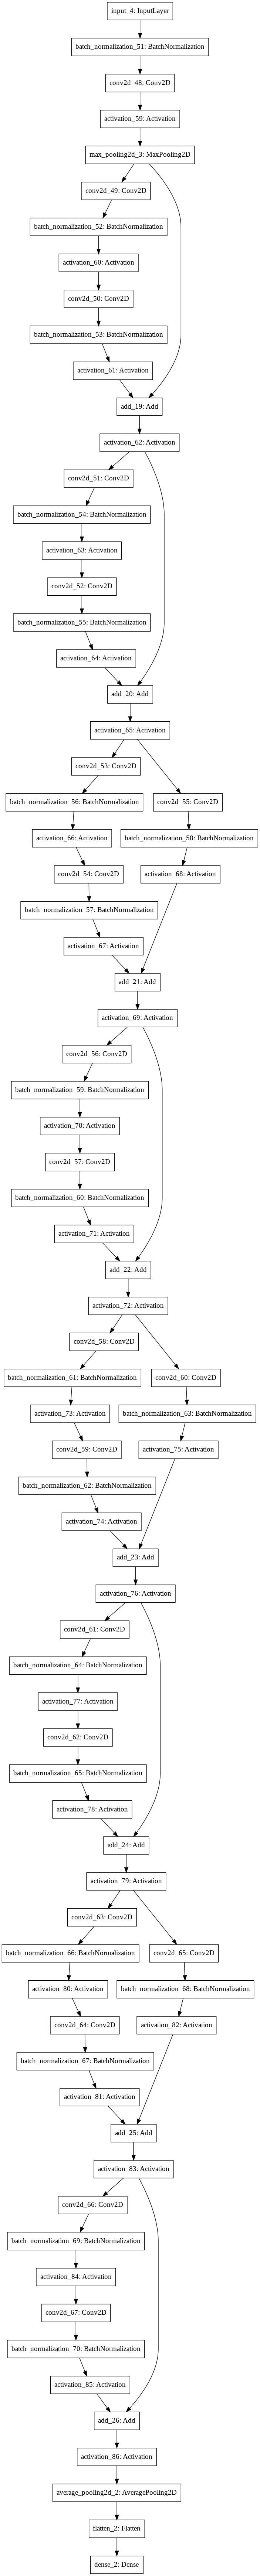

In [42]:
keras.utils.plot_model(model)

In [43]:
#References https://arxiv.org/pdf/1512.03385v1.pdf

learning_rate = 0.0001
decay_rate = learning_rate / EPOCHS
momentum = 0.9

sgd = keras.optimizers.SGD(lr=learning_rate, momentum=momentum, decay=decay_rate)

model.compile(    
        loss='categorical_crossentropy',
        metrics = ['accuracy'],
        optimizer=sgd
    )

In [44]:
#train_generator.image_shape

In [48]:
#callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)


history = model.fit_generator(train_generator,
                              validation_data=valid_generator,
                              epochs=10,
                              #callbacks=[callback],
                              #verbose=0
                  )

Epoch 1/10
50/50 [==============================] - 29s 585ms/step - loss: 0.3788 - accuracy: 0.8562 - val_loss: 0.6559 - val_accuracy: 0.7740
Epoch 2/10
50/50 [==============================] - 29s 574ms/step - loss: 0.3680 - accuracy: 0.8475 - val_loss: 0.6179 - val_accuracy: 0.7720
Epoch 3/10
50/50 [==============================] - 29s 574ms/step - loss: 0.3819 - accuracy: 0.8469 - val_loss: 0.8604 - val_accuracy: 0.7560
Epoch 4/10
50/50 [==============================] - 29s 571ms/step - loss: 0.3634 - accuracy: 0.8431 - val_loss: 1.1122 - val_accuracy: 0.6530
Epoch 5/10
50/50 [==============================] - 29s 573ms/step - loss: 0.4037 - accuracy: 0.8231 - val_loss: 0.5827 - val_accuracy: 0.7740
Epoch 6/10
50/50 [==============================] - 29s 574ms/step - loss: 0.3738 - accuracy: 0.8419 - val_loss: 0.5755 - val_accuracy: 0.7770
Epoch 7/10
50/50 [==============================] - 29s 571ms/step - loss: 0.4347 - accuracy: 0.8112 - val_loss: 0.6989 - val_accuracy: 0.7700

In [49]:
history.history

{'accuracy': [0.856249988079071,
  0.8475000262260437,
  0.846875011920929,
  0.8431249856948853,
  0.8231250047683716,
  0.8418750166893005,
  0.8112499713897705,
  0.8431249856948853,
  0.8656250238418579,
  0.8662499785423279],
 'loss': [0.3787976801395416,
  0.3680134117603302,
  0.38188061118125916,
  0.3634147644042969,
  0.4036841094493866,
  0.3737991452217102,
  0.4347335398197174,
  0.4088161885738373,
  0.33371907472610474,
  0.3268839120864868],
 'val_accuracy': [0.7739999890327454,
  0.7720000147819519,
  0.7559999823570251,
  0.652999997138977,
  0.7739999890327454,
  0.7770000100135803,
  0.7699999809265137,
  0.7200000286102295,
  0.7710000276565552,
  0.7239999771118164],
 'val_loss': [0.6558512449264526,
  0.6179291605949402,
  0.8603992462158203,
  1.1122034788131714,
  0.5827169418334961,
  0.5754994750022888,
  0.6988675594329834,
  0.7703759670257568,
  0.6446962952613831,
  0.8164379000663757]}

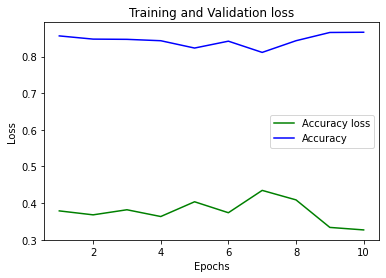

In [54]:
val_accuracy = history.history['loss']
accuracy = history.history['accuracy']

epochs = range(1,10 + 1)
plt.plot(epochs, val_accuracy, 'g', label='Accuracy loss')
plt.plot(epochs, accuracy, 'b', label='Accuracy')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()